In [1]:
import datetime
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [2]:
def input_date():
    return input('Enter year'),input('Enter mounth'),input('Enter day')

In [3]:
print('Enter Starting date')
startDate=datetime.datetime(int(input('Enter year')),int(input('Enter mounth')),int(input('Enter day')))
print('Enter Ending date')
endDate=datetime.datetime(int(input('Enter year')),int(input('Enter mounth')),int(input('Enter day')))

Enter Starting date
Enter year2021
Enter mounth06
Enter day01
Enter Ending date
Enter year2021
Enter mounth09
Enter day01


In [4]:
tata=web.DataReader('TTM','yahoo',startDate,endDate)


In [5]:
tata.reset_index(level=0, inplace=True)


In [6]:
class finding_depth():
    def __init__(self,tata):
        self.tata=tata
    def cal_span_Depth(self):
        sp=[None]*len(self.tata.index)
        sp[0]=1
        depth_data=pd.DataFrame({'Starting Date':sp[0],'Starting Price':sp[0],'Depth Date':sp[0],'Depth Price':sp[0],'Ending Date':[self.tata["Date"]],'Ending Price':[self.tata["Close"]],'No. of Days':sp[0]})
        for i in range(1,len(self.tata.index)):
            sp[i]=1
            depth_data.at[i,'Ending Date']=self.tata['Date'][i]
            depth_data.at[i,'Ending Price']=self.tata['Close'][i]
            depth_data.at[i,'Depth Price']=self.tata["Close"][i]
            depth_data.at[i,'Depth Date']=self.tata["Date"][i]
            
            for j in range(1,i):
                if self.tata["Close"][i]>=self.tata["Close"][j]:
                    depth_data.at[i,'Starting Date']=self.tata['Date'][j]
                    depth_data.at[i,'Starting Price']=self.tata['Close'][j]
                    break
            
            
            #print('~~~~~')
            j = i - 1
            while (j>= 0) and (self.tata["Close"][i]>=self.tata["Close"][j]) :
                sp[i] += 1
                depth_data.at[i,'No. of Days']=sp[i]
                if self.tata['Close'][j]<depth_data['Depth Price'][i]:
                       # temp_max=self.tata['Close'][j]
                        depth_data.at[i,'Depth Date']=self.tata['Date'][j]
                        depth_data.at[i,'Depth Price']=self.tata['Close'][j]
                j -= 1        
        return depth_data.sort_values(by='No. of Days', ascending=False).reset_index().head(10)                    

In [7]:
dp=finding_depth(tata)
#print(dp.cal_span_Depth())
dp.cal_span_Depth()

,index,Starting Date,Starting Price,Depth Date,Depth Price,Ending Date,Ending Price,No. of Days
0,44,2021-07-06 00:00:00,20.330000,2021-07-27 00:00:00,19.270000,2021-08-03 00:00:00,20.559999,21.0
1,65,2021-07-08 00:00:00,19.920000,2021-08-23 00:00:00,18.730000,2021-09-01 00:00:00,20.18,12.0
2,23,2021-06-02 00:00:00,22.340000,2021-06-18 00:00:00,22.180000,2021-07-02 00:00:00,23.049999,12.0
3,63,2021-07-23 00:00:00,19.610001,2021-08-23 00:00:00,18.730000,2021-08-30 00:00:00,19.76,10.0
4,22,2021-06-02 00:00:00,22.340000,2021-06-18 00:00:00,22.180000,2021-07-01 00:00:00,22.969999,10.0
5,62,2021-07-23 00:00:00,19.610001,2021-08-23 00:00:00,18.730000,2021-08-27 00:00:00,19.75,9.0
6,52,2021-07-06 00:00:00,20.330000,2021-08-04 00:00:00,19.719999,2021-08-13 00:00:00,20.5,8.0
7,19,2021-06-02 00:00:00,22.340000,2021-06-18 00:00:00,22.180000,2021-06-28 00:00:00,22.9,7.0
8,51,2021-07-06 00:00:00,20.330000,2021-08-04 00:00:00,19.719999,2021-08-12 00:00:00,20.5,7.0
9,43,2021-07-23 00:00:00,19.610001,2021-07-27 00:00:00,19.270000,2021-08-02 00:00:00,19.84,7.0


In [8]:
class finding_Hike():
    def __init__(self,tata):
        self.tata=tata
    def cal_span_Hike(self):
        sp=[None]*len(self.tata.index)
        sp[0]=1
        Hike_data=pd.DataFrame({'Starting Date':sp[0],'Starting Price':sp[0],'Hike Date':sp[0],'Hike Price':sp[0],'Ending Date':[self.tata["Date"]],'Ending Price':[self.tata["Close"]],'No. of Days':sp[0]})
        for i in range(1,len(self.tata.index)):
            sp[i]=1
            Hike_data.at[i,'Ending Date']=self.tata['Date'][i]
            Hike_data.at[i,'Ending Price']=self.tata['Close'][i]
            Hike_data.at[i,'Hike Price']=self.tata["Close"][i]
            Hike_data.at[i,'Hike Date']=self.tata["Date"][i]
            
            for j in range(1,i):
                if self.tata["Close"][i]<self.tata["Close"][j]:
                    Hike_data.at[i,'Starting Date']=self.tata['Date'][j]
                    Hike_data.at[i,'Starting Price']=self.tata['Close'][j]
                    break
            
            
            #print('~~~~~')
            j = i - 1
            while (j>= 0) and (self.tata["Close"][i]<=self.tata["Close"][j]) :
                sp[i] += 1
                Hike_data.at[i,'No. of Days']=sp[i]
                if self.tata['Close'][j]>Hike_data['Hike Price'][i]:
                       # temp_max=self.tata['Close'][j]
                        Hike_data.at[i,'Hike Date']=self.tata['Date'][j]
                        Hike_data.at[i,'Hike Price']=self.tata['Close'][j]
                j -= 1        
        return Hike_data.sort_values(by='No. of Days', ascending=False).reset_index().head(10)                    

In [9]:
hi=finding_Hike(tata)
#print(hi.cal_span_Hike())
hi.cal_span_Hike()

,index,Starting Date,Starting Price,Hike Date,Hike Price,Ending Date,Ending Price,No. of Days
0,58,2021-06-02 00:00:00,22.34,2021-06-08 00:00:00,24.110001,2021-08-23 00:00:00,18.73,59.0
1,56,2021-06-02 00:00:00,22.34,2021-06-08 00:00:00,24.110001,2021-08-19 00:00:00,19.1,57.0
2,39,2021-06-02 00:00:00,22.34,2021-06-08 00:00:00,24.110001,2021-07-27 00:00:00,19.27,40.0
3,37,2021-06-02 00:00:00,22.34,2021-06-08 00:00:00,24.110001,2021-07-23 00:00:00,19.610001,38.0
4,36,2021-06-02 00:00:00,22.34,2021-06-08 00:00:00,24.110001,2021-07-22 00:00:00,19.889999,37.0
5,26,2021-06-02 00:00:00,22.34,2021-06-08 00:00:00,24.110001,2021-07-08 00:00:00,19.92,27.0
6,24,2021-06-02 00:00:00,22.34,2021-06-08 00:00:00,24.110001,2021-07-06 00:00:00,20.33,25.0
7,55,2021-06-02 00:00:00,22.34,2021-08-03 00:00:00,20.559999,2021-08-18 00:00:00,19.440001,15.0
8,54,2021-06-02 00:00:00,22.34,2021-08-03 00:00:00,20.559999,2021-08-17 00:00:00,19.48,14.0
9,13,2021-06-02 00:00:00,22.34,2021-06-08 00:00:00,24.110001,2021-06-18 00:00:00,22.18,13.0


In [10]:
class visualize():
    def __init__(self,data,tata):
        self.data=data
        self.tata=tata
    def show_graph(self):
        ans1=pd.Series([self.data['Starting Price'][1],self.data['Depth Price'][1],self.data['Ending Price'][1]],index=[self.data['Starting Date'][1],self.data['Depth Date'][1],self.data['Ending Date'][1]],name='Date')
        self.tata.set_index("Date", inplace = True)
        ans1.plot(label='Hike')
        self.tata['Close'].plot(label="Closeing Price")
        plt.legend()
        plt.title('Tata Motors Limited (TTM)')
        plt.ylabel('Stock Prices')
        plt.show()
        tata.reset_index(level=0, inplace=True)

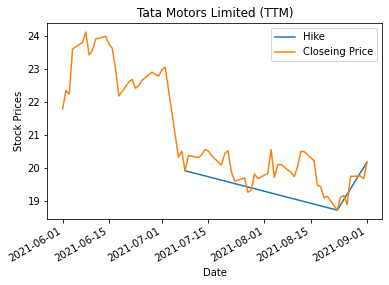

In [11]:
vb=visualize(dp.cal_span_Depth(),tata)
vb.show_graph()